In [204]:
'''
Latest version of global mean precip plots

-SJ
'''


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import glob
import xarray as xr

In [205]:
with open('/edata2/spencer/thesis_data/era5_gmp_native_2015.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype='i8')[0]
    nlons = np.fromfile(f, sep='', count=1, dtype='i8')[0]
    era5_lat = np.fromfile(f, sep='', count=nlats, dtype='f')
    era5_lon = np.fromfile(f, sep='', count=nlons, dtype='f')
    era5_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype='float').reshape(nlats,nlons)
    

era5_gmp_by_lat = np.nanmean(era5_mean_prcp, axis=1)

/tmp/ipykernel_838368/1123264843.py:9: RuntimeWarning: Mean of empty slice
  era5_gmp_by_lat = np.nanmean(era5_mean_prcp, axis=1)


In [206]:
with open('/edata2/spencer/thesis_data/a2cs_gmp_1deg_2015.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype='int')[0]
    nlons = np.fromfile(f, sep='', count=1, dtype='int')[0]
    grid_lats = np.fromfile(f, sep='', count=nlats, dtype='float')
    grid_lons = np.fromfile(f, sep='', count=nlons, dtype='float')
    a2cs_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype='float').reshape(nlats,nlons)
    
a2cs_gmp_by_lat = np.nanmean(a2cs_mean_prcp, axis=1)

/tmp/ipykernel_838368/4051335362.py:8: RuntimeWarning: Mean of empty slice
  a2cs_gmp_by_lat = np.nanmean(a2cs_mean_prcp, axis=1)


In [207]:
with open('/edata2/spencer/thesis_data/csrp_gmp_1deg_2015.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype=int)[0]
    nlons = np.fromfile(f, sep='', count=1, dtype=int)[0]
    grid_lats = np.fromfile(f, sep='', count=nlats, dtype=float)
    grid_lons = np.fromfile(f, sep='', count=nlons, dtype=float)
    csrp_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype=float).reshape(nlats,nlons)
    
csrp_gmp_by_lat = np.nanmean(csrp_mean_prcp, axis=1)

/tmp/ipykernel_838368/4067428144.py:8: RuntimeWarning: Mean of empty slice
  csrp_gmp_by_lat = np.nanmean(csrp_mean_prcp, axis=1)


In [208]:
with open('/edata2/spencer/thesis_data/cspc_gmp_1deg_2015.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype=int)[0]
    nlons = np.fromfile(f, sep='', count=1, dtype=int)[0]
    grid_lats = np.fromfile(f, sep='', count=nlats, dtype=float)
    grid_lons = np.fromfile(f, sep='', count=nlons, dtype=float)
    cspc_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype=float).reshape(nlats,nlons)
    
cspc_gmp_by_lat = np.nanmean(cspc_mean_prcp, axis=1)

/tmp/ipykernel_838368/2273900497.py:8: RuntimeWarning: Mean of empty slice
  cspc_gmp_by_lat = np.nanmean(cspc_mean_prcp, axis=1)


In [209]:
with open('/edata2/spencer/thesis_data/cssp_gmp_1deg_2015.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype=int)[0]
    nlons = np.fromfile(f, sep='', count=1, dtype=int)[0]
    grid_lats = np.fromfile(f, sep='', count=nlats, dtype=float)
    grid_lons = np.fromfile(f, sep='', count=nlons, dtype=float)
    cssp_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype=float).reshape(nlats,nlons)
    
cssp_gmp_by_lat = np.nanmean(cssp_mean_prcp, axis=1)

/tmp/ipykernel_838368/39496222.py:8: RuntimeWarning: Mean of empty slice
  cssp_gmp_by_lat = np.nanmean(cssp_mean_prcp, axis=1)


In [210]:
with open('/edata2/spencer/thesis_data/cmb_gmp_1deg_2015.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype=int)[0]
    nlons = np.fromfile(f, sep='', count=1, dtype=int)[0]
    grid_lats = np.fromfile(f, sep='', count=nlats, dtype=float)
    grid_lons = np.fromfile(f, sep='', count=nlons, dtype=float)
    cmb_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype=float).reshape(nlats,nlons)
    
cmb_gmp_by_lat = np.nanmean(cmb_mean_prcp, axis=1)

/tmp/ipykernel_838368/3900413362.py:8: RuntimeWarning: Mean of empty slice
  cmb_gmp_by_lat = np.nanmean(cmb_mean_prcp, axis=1)


In [211]:
with open('/edata2/spencer/thesis_data/gmi_gmp_1deg_2015.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype=int)[0]
    nlons = np.fromfile(f, sep='', count=1, dtype=int)[0]
    grid_lats = np.fromfile(f, sep='', count=nlats, dtype=float)
    grid_lons = np.fromfile(f, sep='', count=nlons, dtype=float)
    gmi_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype=float).reshape(nlats,nlons)
    
gmi_gmp_by_lat = np.nanmean(gmi_mean_prcp, axis=1)

/tmp/ipykernel_838368/1546048575.py:8: RuntimeWarning: Mean of empty slice
  gmi_gmp_by_lat = np.nanmean(gmi_mean_prcp, axis=1)


In [212]:
#Calculate means:

def calc_mean(mean_prcp_arr, lats):
    nlats = mean_prcp_arr.shape[0]
    nlons = mean_prcp_arr.shape[1]
    
    wgts = np.cos(np.deg2rad(lats))
    wgt_arr = np.zeros(np.shape(mean_prcp_arr))
    for i in np.arange(0,nlons): wgt_arr[:,i] = wgts[:]
    wgt_arr[np.where(np.isnan(mean_prcp_arr))] = np.nan
    mean_prcp_wgt = mean_prcp_arr * wgt_arr
    
    gmp = np.nansum(mean_prcp_wgt) / np.nansum(wgt_arr)
    
    return gmp


era5_gmp = calc_mean(era5_mean_prcp, era5_lat)
a2cs_gmp = calc_mean(a2cs_mean_prcp, grid_lats)
csrp_gmp = calc_mean(csrp_mean_prcp, grid_lats)
cspc_gmp = calc_mean(cspc_mean_prcp, grid_lats)
cssp_gmp = calc_mean(cssp_mean_prcp, grid_lats)
cmb_gmp  = calc_mean(cmb_mean_prcp, grid_lats)
gmi_gmp  = calc_mean(gmi_mean_prcp, grid_lats)

In [213]:
with open('/edata2/spencer/thesis_data/era5_ocean_fraction.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype='i8')[0]
    nlons = np.fromfile(f, sep='', count=1, dtype='i8')[0]
    era5_lat = np.fromfile(f, sep='', count=nlats, dtype='f')
    era5_lon = np.fromfile(f, sep='', count=nlons, dtype='f')
    era5_ocean_frac = np.fromfile(f, sep='', count=nlats*nlons, dtype='float').reshape(nlats,nlons)
    

era5_ocnfrac_by_lat = np.nanmean(era5_ocean_frac, axis=1)

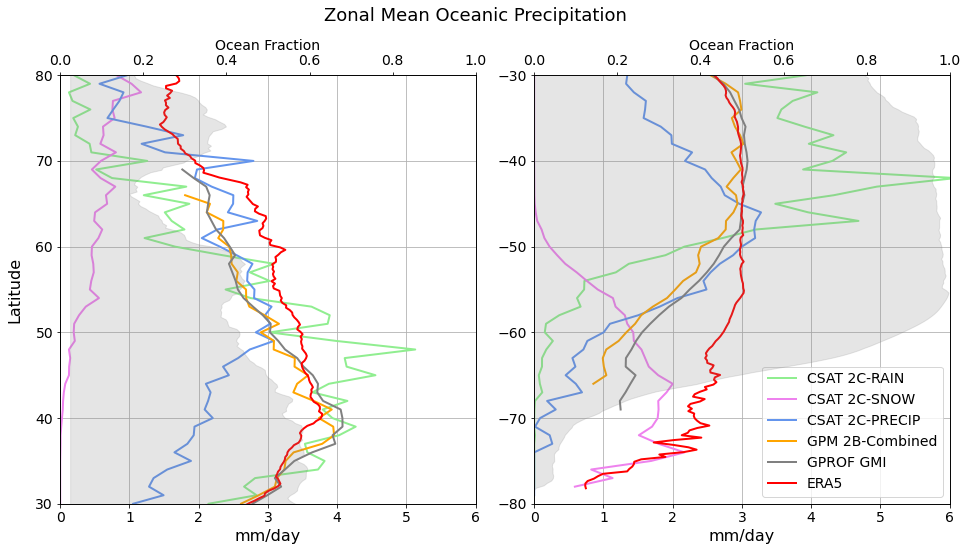

In [214]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[14,8], tight_layout=True, sharex=True)



#---Plot ocean fraction:
ax_1 = ax[0].twiny()
plt.tick_params(axis='both', labelsize=14)
ax_2 = ax[1].twiny()
plt.tick_params(axis='both', labelsize=14)
ax_1.set_xlim(0.,1.)
ax_2.set_xlim(0.,1.)
ax_1.fill_between(era5_ocnfrac_by_lat, era5_lat, 0., color='grey', alpha=0.2)
ax_2.fill_between(era5_ocnfrac_by_lat, era5_lat, 0., color='grey', alpha=0.2)
ax_1.set_xticks(np.arange(0.,1.2,0.2))
ax_2.set_xticks(np.arange(0.,1.2,0.2))
ax_1.set_xlabel('Ocean Fraction', fontsize=14)
ax_2.set_xlabel('Ocean Fraction', fontsize=14)


#ax[0].plot(a2cs_gmp_by_lat, grid_lats, label='AMSR2-CSAT combined', 
#           linewidth=2.5, color='navy')
ax[0].plot(csrp_gmp_by_lat, grid_lats, 
           label=f'CSAT 2C-RAIN', 
           color='lightgreen',
           linewidth=2)
ax[0].plot(cssp_gmp_by_lat, grid_lats, 
           label=f'CSAT 2C-SNOW', 
           color='violet',
           linewidth=2)
ax[0].plot(cspc_gmp_by_lat, grid_lats, 
           label=f'CSAT 2C-PRECIP', 
           color='cornflowerblue',
          linewidth=2)
ax[0].plot(cmb_gmp_by_lat, grid_lats, 
           label=f'GPM 2B-Combined', 
           color='orange',
          linewidth=2)
ax[0].plot(gmi_gmp_by_lat, grid_lats, 
           label=f'GPROF GMI', 
           color='grey',
          linewidth=2)
ax[0].plot(era5_gmp_by_lat, era5_lat, 
           label=f'ERA5', 
           color='red',
          linewidth=2)



ax[0].set_ylim(30, 80)
ax[0].set_xlim(0,6)

ax[0].tick_params(axis='both', which='major', labelsize=14)

ax[0].grid()

#ax[1].plot(a2cs_gmp_by_lat, grid_lats, label='AMSR2-CSAT combined', 
#           linewidth=2.5, color='navy')
ax[1].plot(csrp_gmp_by_lat, grid_lats, 
           label=f'CSAT 2C-RAIN', 
           color='lightgreen',
           linewidth=2)
ax[1].plot(cssp_gmp_by_lat, grid_lats, 
           label=f'CSAT 2C-SNOW', 
           color='violet',
           linewidth=2)
ax[1].plot(cspc_gmp_by_lat, grid_lats, 
           label=f'CSAT 2C-PRECIP', 
           color='cornflowerblue',
          linewidth=2)
ax[1].plot(cmb_gmp_by_lat, grid_lats, 
           label=f'GPM 2B-Combined', 
           color='orange',
          linewidth=2)
ax[1].plot(gmi_gmp_by_lat, grid_lats, 
           label=f'GPROF GMI', 
           color='grey',
          linewidth=2)
ax[1].plot(era5_gmp_by_lat, era5_lat, 
           label=f'ERA5', 
           color='red',
          linewidth=2)






ax[1].set_ylim(-80, -30)
ax[1].set_xlabel('mm/day', fontsize=16)
ax[0].set_xlabel('mm/day', fontsize=16)
ax[1].set_xlim(0,6)
ax[1].grid()

ax[1].tick_params(axis='both', which='major', labelsize=14)


fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Latitude", fontsize=16, labelpad=15)


plt.suptitle('Zonal Mean Oceanic Precipitation', fontsize=18)

ax[1].legend(fontsize=14, loc='lower right')

plt.show()

In [215]:
with open('/edata2/spencer/thesis_data/era5_gmp_native_2015_lt.25mm.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype='i8')[0]
    nlons = np.fromfile(f, sep='', count=1, dtype='i8')[0]
    era5_lat = np.fromfile(f, sep='', count=nlats, dtype='f')
    era5_lon = np.fromfile(f, sep='', count=nlons, dtype='f')
    era5_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype='float').reshape(nlats,nlons)
    

era5_gmp_by_lat = np.nanmean(era5_mean_prcp, axis=1)

/tmp/ipykernel_838368/1846730122.py:9: RuntimeWarning: Mean of empty slice
  era5_gmp_by_lat = np.nanmean(era5_mean_prcp, axis=1)


In [216]:
with open('/edata2/spencer/thesis_data/a2cs_gmp_1deg_2015_lt.25mm.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype='int')[0]
    nlons = np.fromfile(f, sep='', count=1, dtype='int')[0]
    grid_lats = np.fromfile(f, sep='', count=nlats, dtype='float')
    grid_lons = np.fromfile(f, sep='', count=nlons, dtype='float')
    a2cs_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype='float').reshape(nlats,nlons)
    
a2cs_gmp_by_lat = np.nanmean(a2cs_mean_prcp, axis=1)

/tmp/ipykernel_838368/425917589.py:8: RuntimeWarning: Mean of empty slice
  a2cs_gmp_by_lat = np.nanmean(a2cs_mean_prcp, axis=1)


In [217]:
with open('/edata2/spencer/thesis_data/a2cs_radar_gmp_1deg_2015_lt.25mm.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype='int')[0]
    nlons = np.fromfile(f, sep='', count=1, dtype='int')[0]
    grid_lats = np.fromfile(f, sep='', count=nlats, dtype='float')
    grid_lons = np.fromfile(f, sep='', count=nlons, dtype='float')
    a2cs_rdo_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype='float').reshape(nlats,nlons)
    
a2cs_rdo_gmp_by_lat = np.nanmean(a2cs_rdo_mean_prcp, axis=1)

/tmp/ipykernel_838368/3964613405.py:8: RuntimeWarning: Mean of empty slice
  a2cs_rdo_gmp_by_lat = np.nanmean(a2cs_rdo_mean_prcp, axis=1)


In [218]:
with open('/edata2/spencer/thesis_data/csrp_gmp_1deg_2015_lt.25mm.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype=int)[0]
    nlons = np.fromfile(f, sep='', count=1, dtype=int)[0]
    grid_lats = np.fromfile(f, sep='', count=nlats, dtype=float)
    grid_lons = np.fromfile(f, sep='', count=nlons, dtype=float)
    csrp_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype=float).reshape(nlats,nlons)
    
csrp_gmp_by_lat = np.nanmean(csrp_mean_prcp, axis=1)

/tmp/ipykernel_838368/3815340990.py:8: RuntimeWarning: Mean of empty slice
  csrp_gmp_by_lat = np.nanmean(csrp_mean_prcp, axis=1)


In [219]:
with open('/edata2/spencer/thesis_data/cspc_gmp_1deg_2015_lt.25mm.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype=int)[0]
    nlons = np.fromfile(f, sep='', count=1, dtype=int)[0]
    grid_lats = np.fromfile(f, sep='', count=nlats, dtype=float)
    grid_lons = np.fromfile(f, sep='', count=nlons, dtype=float)
    cspc_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype=float).reshape(nlats,nlons)
    
cspc_gmp_by_lat = np.nanmean(cspc_mean_prcp, axis=1)

/tmp/ipykernel_838368/2594939389.py:8: RuntimeWarning: Mean of empty slice
  cspc_gmp_by_lat = np.nanmean(cspc_mean_prcp, axis=1)


In [220]:
with open('/edata2/spencer/thesis_data/cssp_gmp_1deg_2015_lt.25mm.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype=int)[0]
    nlons = np.fromfile(f, sep='', count=1, dtype=int)[0]
    grid_lats = np.fromfile(f, sep='', count=nlats, dtype=float)
    grid_lons = np.fromfile(f, sep='', count=nlons, dtype=float)
    cssp_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype=float).reshape(nlats,nlons)
    
cssp_gmp_by_lat = np.nanmean(cssp_mean_prcp, axis=1)

/tmp/ipykernel_838368/1409429225.py:8: RuntimeWarning: Mean of empty slice
  cssp_gmp_by_lat = np.nanmean(cssp_mean_prcp, axis=1)


In [221]:
with open('/edata2/spencer/thesis_data/cmb_gmp_1deg_2015_lt.25mm.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype=int)[0]
    nlons = np.fromfile(f, sep='', count=1, dtype=int)[0]
    grid_lats = np.fromfile(f, sep='', count=nlats, dtype=float)
    grid_lons = np.fromfile(f, sep='', count=nlons, dtype=float)
    cmb_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype=float).reshape(nlats,nlons)
    
cmb_gmp_by_lat = np.nanmean(cmb_mean_prcp, axis=1)

/tmp/ipykernel_838368/449468702.py:8: RuntimeWarning: Mean of empty slice
  cmb_gmp_by_lat = np.nanmean(cmb_mean_prcp, axis=1)


In [222]:
with open('/edata2/spencer/thesis_data/gmi_gmp_1deg_2015_lt.25mm.bin', 'rb') as f:
    nlats = np.fromfile(f, sep='', count=1, dtype=int)[0]
    nlons = np.fromfile(f, sep='', count=1, dtype=int)[0]
    grid_lats = np.fromfile(f, sep='', count=nlats, dtype=float)
    grid_lons = np.fromfile(f, sep='', count=nlons, dtype=float)
    gmi_mean_prcp = np.fromfile(f, sep='', count=nlats*nlons, dtype=float).reshape(nlats,nlons)
    
gmi_gmp_by_lat = np.nanmean(gmi_mean_prcp, axis=1)

/tmp/ipykernel_838368/1521032062.py:8: RuntimeWarning: Mean of empty slice
  gmi_gmp_by_lat = np.nanmean(gmi_mean_prcp, axis=1)


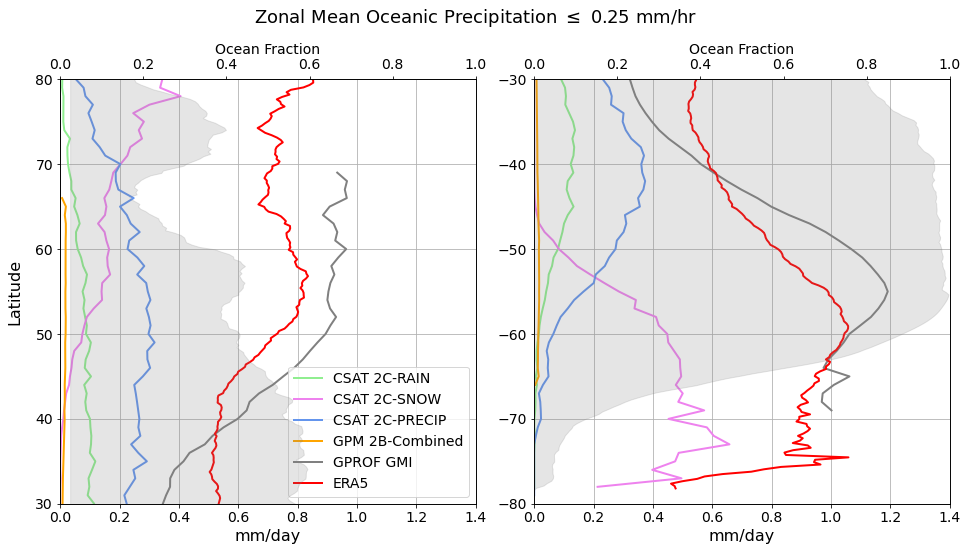

In [230]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[14,8], tight_layout=True, sharex=True)


#---Plot ocean fraction:
ax_1 = ax[0].twiny()
plt.tick_params(axis='both', labelsize=14)
ax_2 = ax[1].twiny()
plt.tick_params(axis='both', labelsize=14)
ax_1.set_xlim(0.,1.)
ax_2.set_xlim(0.,1.)
ax_1.fill_between(era5_ocnfrac_by_lat, era5_lat, 0., color='grey', alpha=0.2)
ax_2.fill_between(era5_ocnfrac_by_lat, era5_lat, 0., color='grey', alpha=0.2)
ax_1.set_xticks(np.arange(0.,1.2,0.2))
ax_2.set_xticks(np.arange(0.,1.2,0.2))
ax_1.set_xlabel('Ocean Fraction', fontsize=14)
ax_2.set_xlabel('Ocean Fraction', fontsize=14)

#ax[0].plot(a2cs_gmp_by_lat, grid_lats, label='AMSR2-CSAT combined', 
#           linewidth=2.5, color='navy', linestyle='--')
ax[0].plot(csrp_gmp_by_lat, grid_lats, label='CSAT 2C-RAIN', 
           linewidth=2, color='lightgreen')
ax[0].plot(cssp_gmp_by_lat, grid_lats, label='CSAT 2C-SNOW',
           linewidth=2, color='violet')
ax[0].plot(cspc_gmp_by_lat, grid_lats, label='CSAT 2C-PRECIP',
           linewidth=2, color='cornflowerblue')
ax[0].plot(cmb_gmp_by_lat, grid_lats, label='GPM 2B-Combined', 
           linewidth=2, color='orange')
ax[0].plot(gmi_gmp_by_lat, grid_lats, label='GPROF GMI', 
           linewidth=2, color='grey')
ax[0].plot(era5_gmp_by_lat, era5_lat, label='ERA5', 
           linewidth=2, color='r')


ax[0].set_ylim(30, 80)

ax[0].tick_params(axis='both', which='major', labelsize=14)

ax[0].grid()

#ax[1].plot(a2cs_gmp_by_lat, grid_lats, label='AMSR2-CSAT combined', 
#           linewidth=2.5, color='navy', linestyle='--')
ax[1].plot(csrp_gmp_by_lat, grid_lats, label='CSAT 2C-RAIN', 
           linewidth=2, color='lightgreen')
ax[1].plot(cssp_gmp_by_lat, grid_lats, label='CSAT 2C-SNOW',
           linewidth=2, color='violet')
ax[1].plot(cspc_gmp_by_lat, grid_lats, label='CSAT 2C-PRECIP',
           linewidth=2, color='cornflowerblue')
ax[1].plot(cmb_gmp_by_lat, grid_lats, label='GPM 2B-Combined', 
           linewidth=2, color='orange')
ax[1].plot(gmi_gmp_by_lat, grid_lats, label='GPROF GMI', 
           linewidth=2, color='grey')
ax[1].plot(era5_gmp_by_lat, era5_lat, label='ERA5', 
           linewidth=2, color='r')


ax[1].set_ylim(-80, -30)
ax[1].set_xlabel('mm/day', fontsize=16)
ax[0].set_xlabel('mm/day', fontsize=16)
ax[1].set_xlim(0,1.4)
ax[1].grid()

ax[1].tick_params(axis='both', which='major', labelsize=14)


fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Latitude", fontsize=16, labelpad=15)


plt.suptitle('Zonal Mean Oceanic Precipitation $\leq$ 0.25 mm/hr', fontsize=18)

ax[0].legend(fontsize=14, loc='lower right')

plt.show()

In [224]:
#Calculate means:

def calc_mean(mean_prcp_arr, lats):
    nlats = mean_prcp_arr.shape[0]
    nlons = mean_prcp_arr.shape[1]

    wgts = np.cos(np.deg2rad(lats))
    wgt_arr = np.zeros(np.shape(mean_prcp_arr))
    
    for i in np.arange(0,nlons): 
        wgt_arr[:,i] = wgts[:]
        
    wgt_arr[np.where(np.isnan(mean_prcp_arr))] = np.nan
    
    #Get rid of low latitude data:
    low_lats = np.logical_and(lats > -40., lats < 40.)
    wgt_arr[low_lats] = np.nan
    
    mean_prcp_wgt = mean_prcp_arr * wgt_arr
    
    mean_prcp_wgt[np.where(np.isnan(wgt_arr))] = np.nan
    
    
    gmp = np.nansum(mean_prcp_wgt) / np.nansum(wgt_arr)
    
    return gmp


era5_gmp_driz = calc_mean(era5_mean_prcp, era5_lat)
a2cs_gmp_driz = calc_mean(a2cs_mean_prcp, grid_lats)
csrp_gmp_driz = calc_mean(csrp_mean_prcp, grid_lats)
cspc_gmp_driz = calc_mean(cspc_mean_prcp, grid_lats)
cssp_gmp_driz = calc_mean(cssp_mean_prcp, grid_lats)
cmb_gmp_driz  = calc_mean(cmb_mean_prcp, grid_lats)
gmi_gmp_driz  = calc_mean(gmi_mean_prcp, grid_lats)
#csboth_gmp_driz = calc_mean(csboth_mean_prcp, grid_lats)

In [225]:
print('DOMAIN MEANS OF PRECIP FROM EACH PRODUCT:')
print('ERA5: ', era5_gmp_driz)
print('A2CS: ', a2cs_gmp_driz)
print('2C-RAIN: ', csrp_gmp_driz)
print('2C-SNOW: ', cssp_gmp_driz)
print('2C-PRECIP: ', cspc_gmp_driz)
print('CMB: ', cmb_gmp_driz)
print('GPROF GMI:', gmi_gmp_driz) 
print('2C-RAIN + 2C-SNOW', csrp_gmp_driz + cssp_gmp_driz)

DOMAIN MEANS OF PRECIP FROM EACH PRODUCT:
ERA5:  0.7943299403536512
A2CS:  0.26302063711623924
2C-RAIN:  0.06527776600003284
2C-SNOW:  0.1790609626642343
2C-PRECIP:  0.22042852429123097
CMB:  0.014968157580556175
GPROF GMI: 0.9202856889520034
2C-RAIN + 2C-SNOW 0.24433872866426715


In [226]:
print('Percent difference of A2CS from other products: ')
print('From ERA5: ', (a2cs_gmp_driz/era5_gmp_driz)-1.)
print('From 2C-RAIN: ', (a2cs_gmp_driz/csrp_gmp_driz) - 1.)
print('From 2C-SNOW: ', (a2cs_gmp_driz/cssp_gmp_driz) - 1.)
print('From 2C-RAIN+2C-SNOW: ', (a2cs_gmp_driz/(csrp_gmp_driz+cssp_gmp_driz)) - 1.)
print('From 2C-PRECIP: ', (a2cs_gmp_driz/cspc_gmp_driz) - 1.)
#print('From CMB: ', (a2cs_gmp_driz/cmb_gmp_driz) - 1.)
print('From GPROF GMI: ', (a2cs_gmp_driz/gmi_gmp_driz) - 1.)

Percent difference of A2CS from other products: 
From ERA5:  -0.6688773471145538
From 2C-RAIN:  3.029253040248144
From 2C-SNOW:  0.46888876951612124
From 2C-RAIN+2C-SNOW:  0.07645905564828381
From 2C-PRECIP:  0.19322414357197903
From GPROF GMI:  -0.7141967540364992


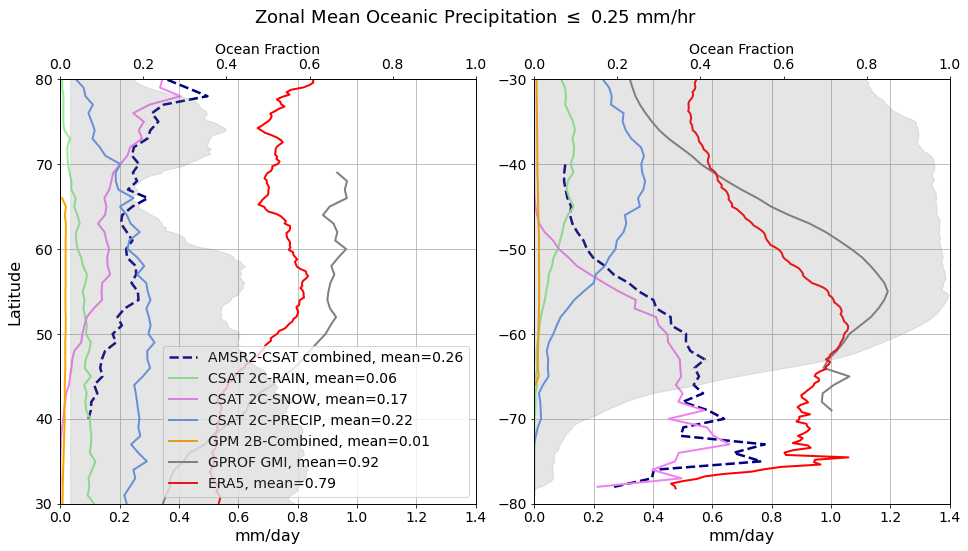

In [231]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[14,8], tight_layout=True, sharex=True)


#---Plot ocean fraction:
ax_1 = ax[0].twiny()
plt.tick_params(axis='both', labelsize=14)
ax_2 = ax[1].twiny()
plt.tick_params(axis='both', labelsize=14)
ax_1.set_xlim(0.,1.)
ax_2.set_xlim(0.,1.)
ax_1.fill_between(era5_ocnfrac_by_lat, era5_lat, 0., color='grey', alpha=0.2)
ax_2.fill_between(era5_ocnfrac_by_lat, era5_lat, 0., color='grey', alpha=0.2)
ax_1.set_xticks(np.arange(0.,1.2,0.2))
ax_2.set_xticks(np.arange(0.,1.2,0.2))
ax_1.set_xlabel('Ocean Fraction', fontsize=14)
ax_2.set_xlabel('Ocean Fraction', fontsize=14)

ax[0].plot(a2cs_gmp_by_lat, grid_lats, label=f'AMSR2-CSAT combined, mean={str(a2cs_gmp_driz)[:4]}', 
           linewidth=2.5, color='navy', linestyle='--')
ax[0].plot(csrp_gmp_by_lat, grid_lats, label=f'CSAT 2C-RAIN, mean={str(csrp_gmp_driz)[:4]}', 
           linewidth=2, color='lightgreen')
ax[0].plot(cssp_gmp_by_lat, grid_lats, label=f'CSAT 2C-SNOW, mean={str(cssp_gmp_driz)[:4]}',
           linewidth=2, color='violet')
ax[0].plot(cspc_gmp_by_lat, grid_lats, label=f'CSAT 2C-PRECIP, mean={str(cspc_gmp_driz)[:4]}',
           linewidth=2, color='cornflowerblue')
ax[0].plot(cmb_gmp_by_lat, grid_lats, label=f'GPM 2B-Combined, mean={str(cmb_gmp_driz)[:4]}', 
           linewidth=2, color='orange')
ax[0].plot(gmi_gmp_by_lat, grid_lats, label=f'GPROF GMI, mean={str(gmi_gmp_driz)[:4]}', 
           linewidth=2, color='grey')
ax[0].plot(era5_gmp_by_lat, era5_lat, label=f'ERA5, mean={str(era5_gmp_driz)[:4]}', 
           linewidth=2, color='r')


ax[0].set_ylim(30, 80)

ax[0].tick_params(axis='both', which='major', labelsize=14)

ax[0].grid()

ax[1].plot(a2cs_gmp_by_lat, grid_lats, label=f'AMSR2-CSAT combined', 
           linewidth=2.5, color='navy', linestyle='--')
ax[1].plot(csrp_gmp_by_lat, grid_lats, label='CSAT 2C-RAIN', 
           linewidth=2, color='lightgreen')
ax[1].plot(cssp_gmp_by_lat, grid_lats, label='CSAT 2C-SNOW',
           linewidth=2, color='violet')
ax[1].plot(cspc_gmp_by_lat, grid_lats, label='CSAT 2C-PRECIP',
           linewidth=2, color='cornflowerblue')
ax[1].plot(cmb_gmp_by_lat, grid_lats, label='GPM 2B-Combined', 
           linewidth=2, color='orange')
ax[1].plot(gmi_gmp_by_lat, grid_lats, label='GPROF GMI', 
           linewidth=2, color='grey')
ax[1].plot(era5_gmp_by_lat, era5_lat, label='ERA5', 
           linewidth=2, color='r')


ax[1].set_ylim(-80, -30)
ax[1].set_xlabel('mm/day', fontsize=16)
ax[0].set_xlabel('mm/day', fontsize=16)
ax[1].set_xlim(0,1.4)
ax[1].grid()

ax[1].tick_params(axis='both', which='major', labelsize=14)


fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Latitude", fontsize=16, labelpad=15)


plt.suptitle('Zonal Mean Oceanic Precipitation $\leq$ 0.25 mm/hr', fontsize=18)

ax[0].legend(fontsize=14, loc='lower right')

plt.show()